In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("house_rental_data.csv.txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [7]:
# dropping "unnamed" column

df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [8]:
#getting idea about null values

df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
#getting an idea about datatypes of the columns

df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

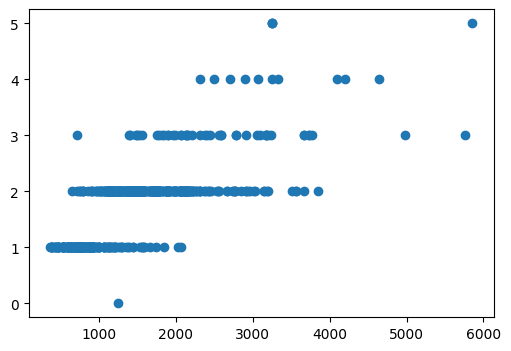

In [11]:
#checking outliers
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df["Sqft"],df["Bathroom"])

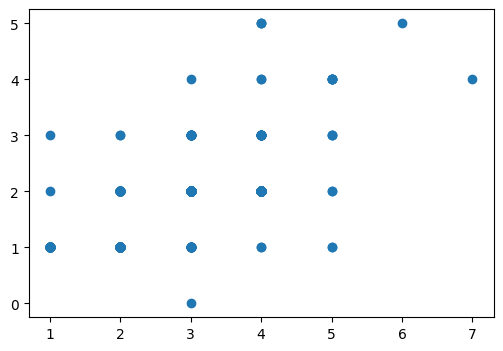

In [18]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df["Bedroom"],df["Bathroom"])

In [12]:
#taking necessary columns on data
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [13]:
#standard Scaling

scaler = StandardScaler()
df[["Sqft","Price"]] = scaler.fit_transform(df[["Sqft","Price"]])
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,-0.456393,2,7,2,2,2,0.000370
1,0.791798,5,7,4,2,2,0.449714
2,-0.507434,5,7,2,2,1,-0.111966
3,-0.089824,2,7,3,2,2,-0.477058
4,-0.730160,11,14,3,2,2,-0.477058


In [14]:
#finding the optimal number of clusters using k means

K = range(1,15)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}


#making a seperate array file
array1 = df['Sqft'].to_numpy()
array2 = df['Price'].to_numpy()
array =np.array(list(zip(array1, array2))).reshape(len(array1), 2)
                
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(array)
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,'euclidean'), axis=1))/array.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,'euclidean'), axis=1))/array.shape[0]
    mapping2[k] = kmeanModel.inertia_


C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

In [15]:
#using distortions tabulating results

for key, val in mapping1.items():
    print(str(key)+ ":"+ str(val))

1:1.1026174096340793
2:0.7546661560526784
3:0.5911947291633968
4:0.4862215984171987
5:0.4378520867611029
6:0.39860483075169706
7:0.37604612426387557
8:0.3506218458654478
9:0.3412805818398184
10:0.3234310470440328
11:0.301090131388756
12:0.28881955767458933
13:0.27535613216419563
14:0.2667839546224363


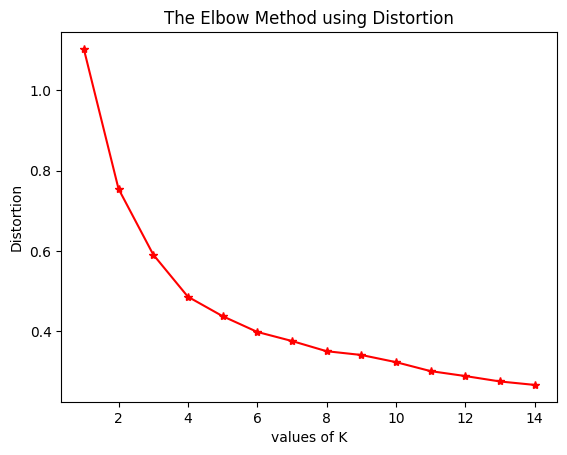

In [16]:
#visualizing the result

plt.plot(K, distortions, 'r*-')
plt.xlabel('values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


1:1289.9999999999995
2:575.884667187431
3:316.2762753465679
4:227.93911693305407
5:182.01361842867038
6:148.82399013996812
7:127.36145432052551
8:114.69083126878182
9:103.55455882255768
10:93.74714314785632
11:82.88180109277532
12:76.0002770563974
13:68.30500289978545
14:62.583997804766845


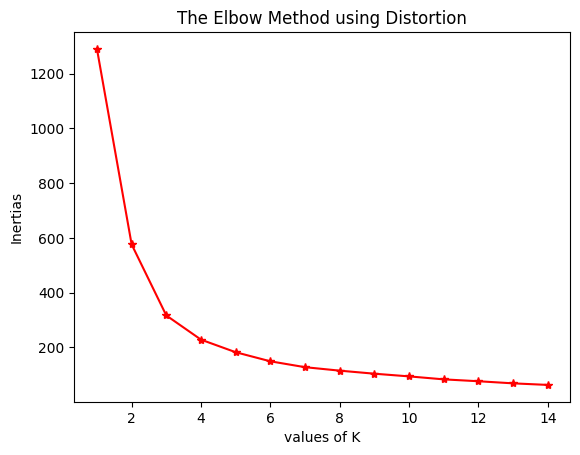

In [55]:
for key, val in mapping2.items():
    print(str(key)+ ":"+ str(val))
plt.plot(K, inertias, 'r*-')
plt.xlabel('values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Distortion')
plt.show()

    

In [1]:
#from distortion optimal value is 4
#from inertia optimal value is 3

In [2]:
#creating the optimal value

In [18]:
data = pd.DataFrame(array, columns = ('Sqft', 'Price'))

kmeans = KMeans(n_clusters = 5).fit(data)
centroids = kmeans.cluster_centers_
centroids

C:\Users\Sindhiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.97312261, -0.75435214],
       [ 0.55393883,  0.46332589],
       [ 1.4375737 ,  1.69030815],
       [-0.12798083, -0.3617536 ],
       [ 3.29145473,  3.60173078]])

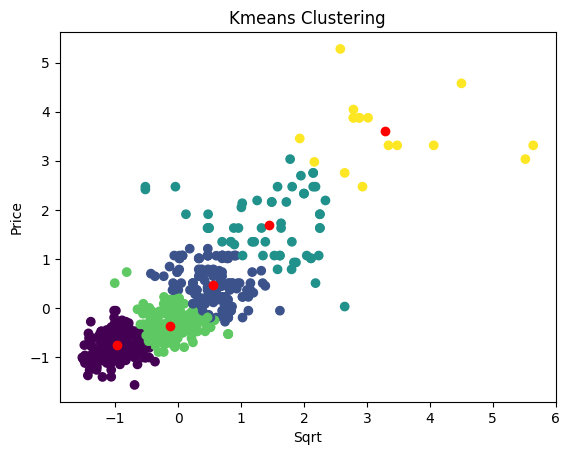

In [20]:
#scatter plot

plt.scatter(data['Sqft'], data['Price'], c=kmeans.labels_.astype(float))

plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.xlabel("Sqrt")
plt.ylabel("Price")
plt.title("Kmeans Clustering")
plt.show()